In [1]:
import twstock
from twstock import stock
from twstock import realtime
import matplotlib.pyplot as plt
import pandas as pd
import sys
import sqlite3
from datetime import datetime

In [2]:
def read_stock(sid):
    strdate = datetime.now().strftime("%Y%m%d")
    conn = sqlite3.connect('%s/%s.db' % (strdate,sid),detect_types=sqlite3.PARSE_DECLTYPES)
    cursor = conn.cursor()

    # Read table
    sqlite_data = cursor.execute('SELECT * FROM stocks').fetchall()
    
    data_pd = pd.DataFrame(sqlite_data,columns=['date', 'capacity', 'turnover', 'open', 'high', 'low', 'close', 'change', 'transaction'])
    
    return data_pd

In [23]:
def get_stock(sid,sqldb=True):
    #sid = 2330
    #stocks = realtime.get(str(sid))
    name = twstock.twse[str(sid)].name
    
    if sqldb:
        stock_pd = read_stock(str(sid))
    else:
        stock_data = stock.Stock(str(sid)).fetch_days(180)
        stock_pd = pd.DataFrame(stock_data)
        
    stock_pd = stock_pd.set_index('date')
    
    stock_ma3 = stock_pd.rolling(3).mean()
    stock_ma5 = stock_pd.rolling(5).mean()
    stock_ma8 = stock_pd.rolling(8).mean()
    stock_ma20 = stock_pd.rolling(20).mean()
    stock_ma60 = stock_pd.rolling(60).mean()

    data = pd.concat([stock_ma3['close'],stock_ma5['close'],stock_ma8['close']],axis=1)
    std = data.std(axis=1)
    mean = data.mean(axis=1)
    
    data = {}
    data['stock_pd'] = stock_pd
    data['stock_ma3'] = stock_ma3
    data['stock_ma5'] = stock_ma5
    data['stock_ma8'] = stock_ma8
    data['stock_ma20'] = stock_ma20
    data['stock_ma60'] = stock_ma60
    data['stock_std'] = std
    data['stock_norstd'] = std.div(mean)
    data['stock_name'] = name
    data['stock_id'] = sid
    return data

In [4]:
def plot(data):
    def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
            sp.set_visible(False)

    fig, ax1 = plt.subplots(figsize=(10, 6))

    fig.subplots_adjust(right=0.8)
    
    ax1.set_xlabel('日期')
    ax1.set_ylabel('價格（每股）')

    ax1.plot(data['stock_pd'].close, '-' , label="收盤價",color='k',zorder=10)
    ax1.plot(data['stock_ma3'].close, '-' , label="3日均價",zorder=10)
    ax1.plot(data['stock_ma5'].close, '-' , label="5日均價",zorder=10)
    ax1.plot(data['stock_ma8'].close, '-' , label="8日均價",zorder=10)
    ax1.plot(data['stock_ma20'].close, '-' , label="20日均價",zorder=10)
    ax1.plot(data['stock_ma60'].close, '-' , label="60日均價",zorder=10)
    ax1.tick_params(axis='y', labelcolor='k')
    ax1.legend(loc='best')

    ax2 = ax1.twinx()

    ax2.spines["right"].set_position(("axes", 1.1))
    make_patch_spines_invisible(ax2)
    ax2.spines["right"].set_visible(True)
    
    ax2.set_ylabel('變異係數',color='b')
    ax2.tick_params(axis='y', labelcolor='b')
    ax2.plot(data['stock_norstd'], label="3,5,8日離散度",color='b',alpha=0.5, zorder=20)
    #ax2.legend(loc='upper right')

    ax3 = ax1.twinx()
    ax3.set_ylabel('成交量(張)',color='g')
    ax3.tick_params(axis='y', labelcolor='g')
    ax3.bar(data['stock_pd'].index,data['stock_pd'].capacity.div(1000), width=1.2,label="成交量",color='g',alpha=0.3, zorder=0)
    #ax3.legend(loc='upper center')
     
    fig.autofmt_xdate()
    fig.tight_layout()     
    
    plt.title('%d %s 股市分析圖   ' % (data['stock_id'],data['stock_name']) ,loc='right')
    plt.grid(True,which='both')
    plt.tight_layout()
    
    fig.savefig('analysis_%d%s.png' % (data['stock_id'],data['stock_name']))
    fig.savefig('analysis_%d%s.pdf' % (data['stock_id'],data['stock_name']))
    plt.show()
    

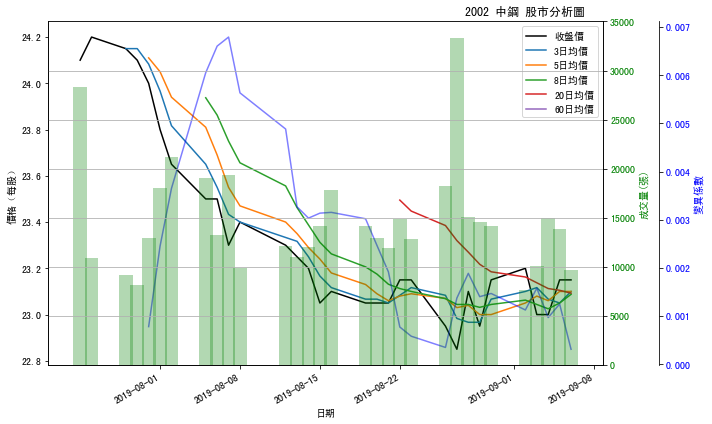

In [12]:
plot(get_stock(2002))

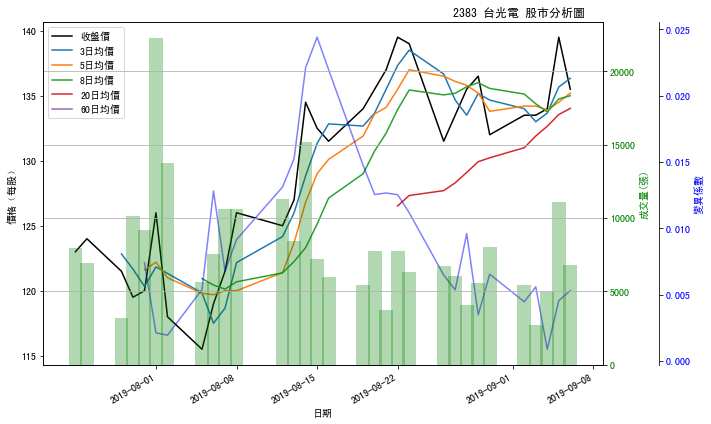

In [13]:
plot(get_stock(2383))

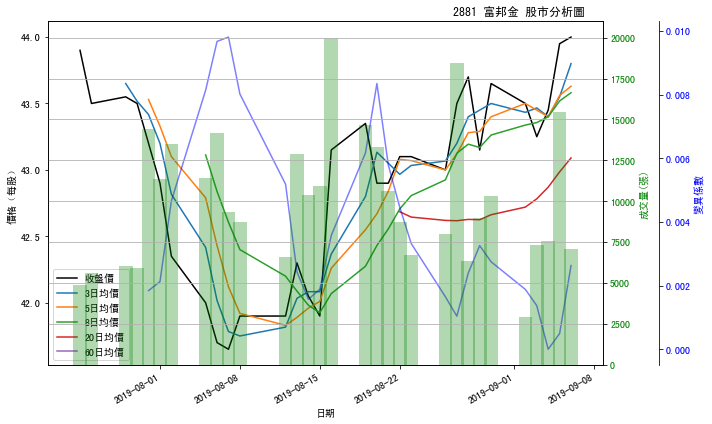

In [14]:
plot(get_stock(2881))

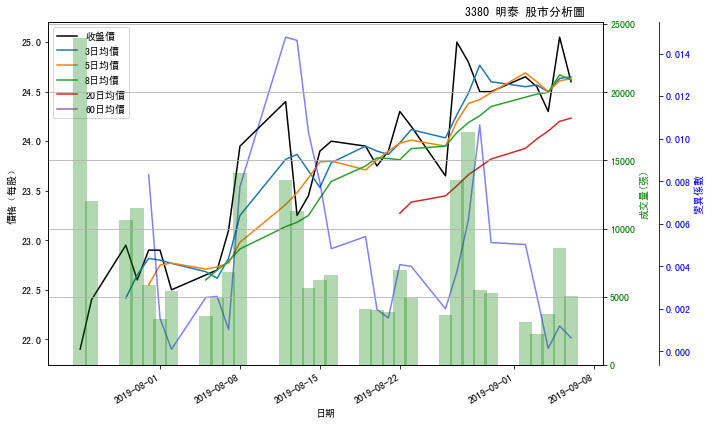

In [15]:
plot(get_stock(3380))

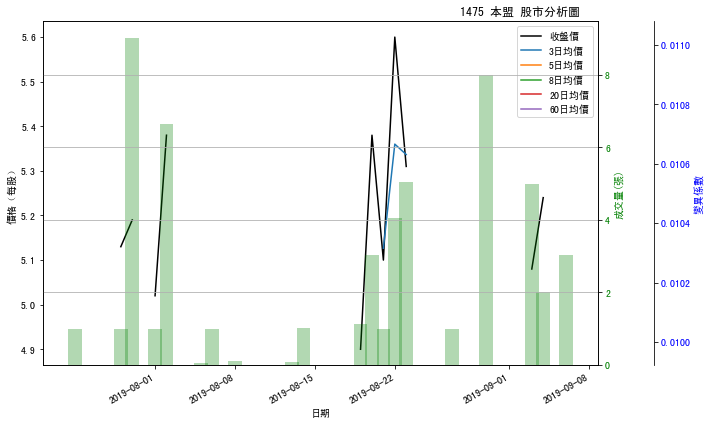

In [10]:
plot(get_stock(1475))

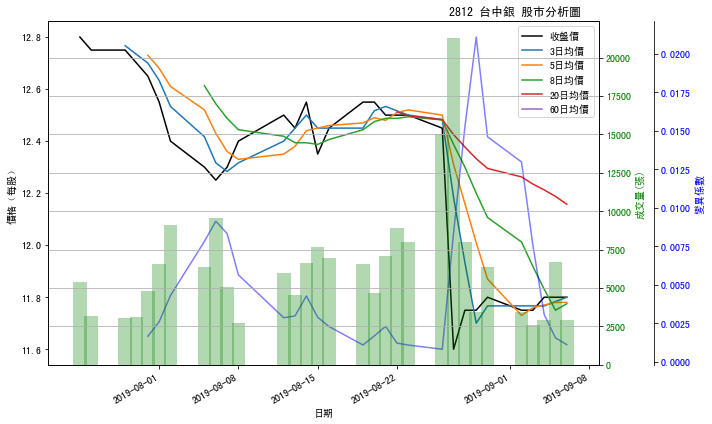

In [11]:
plot(get_stock(2812))

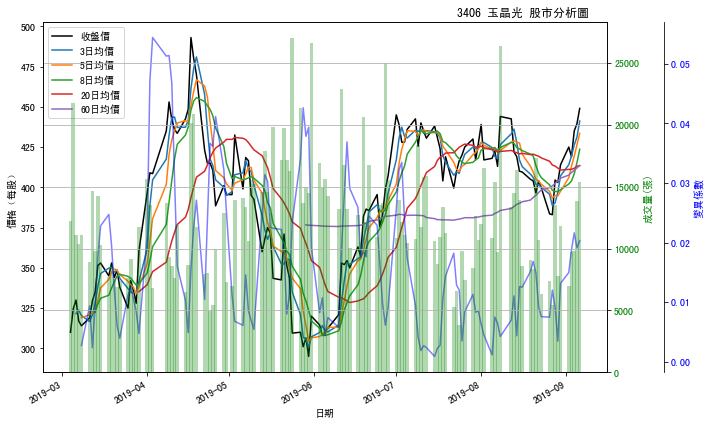

In [203]:
# plot & get data
plot(get_stock(3406))

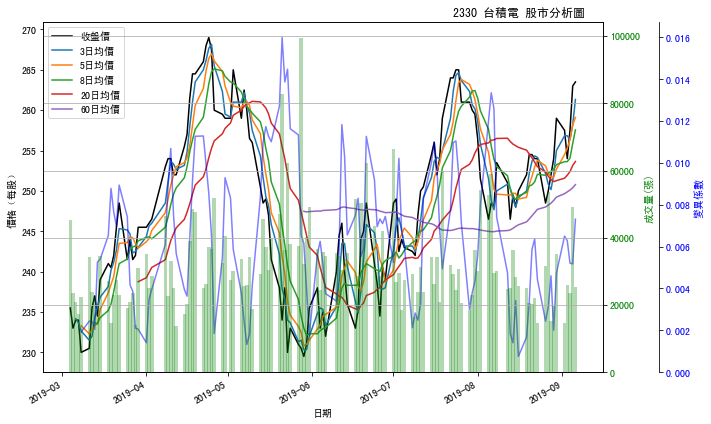

In [205]:
plot(get_stock(2330))

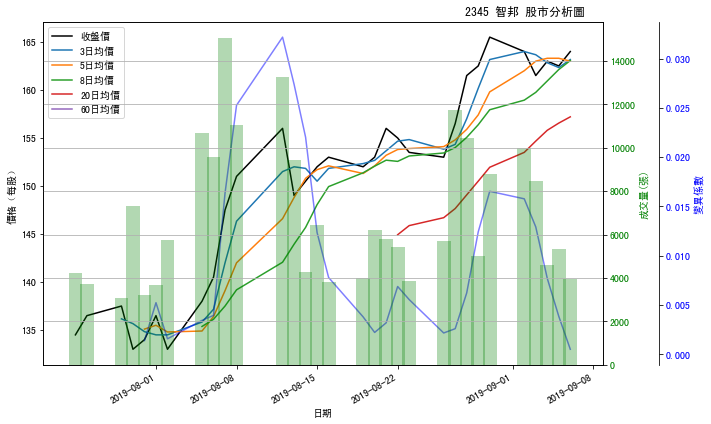

In [19]:
plot(get_stock(2345))

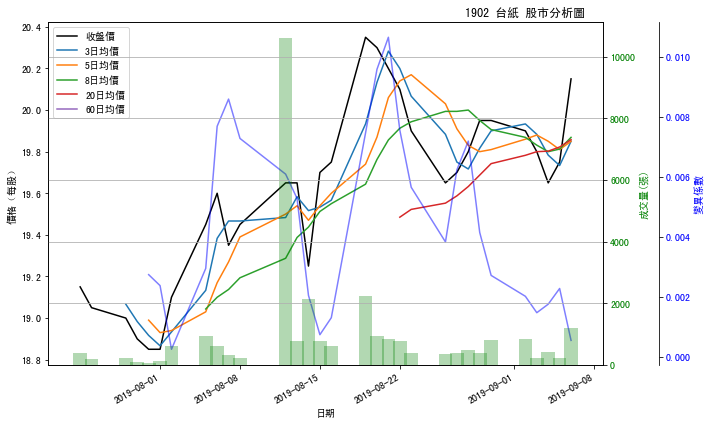

In [16]:
plot(get_stock(1902))

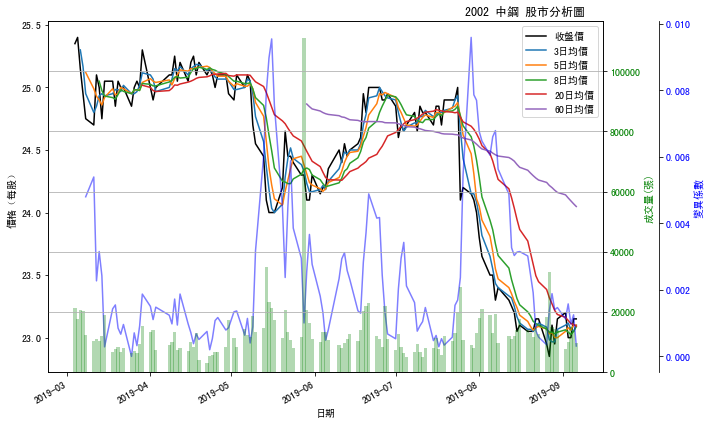

In [25]:
plot(get_stock(2002,False))

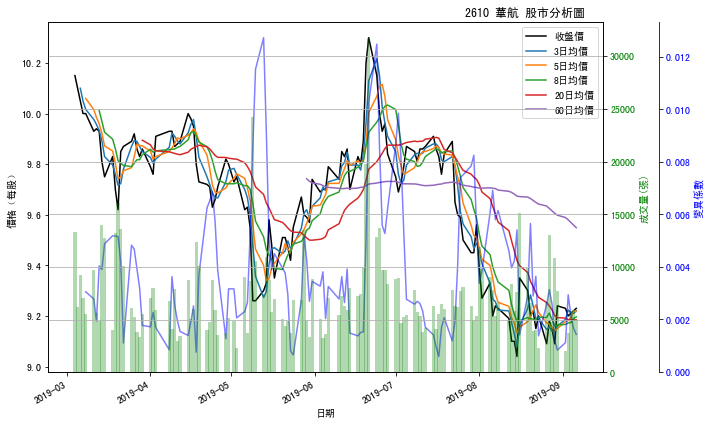

In [29]:
plot(get_stock(2610,sqldb=False))